<h2 style="text-align: center">Sample Linear Regression</h2>

In [2]:
# import library
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [88]:
torch.manual_seed(82)


weight = .7
bias = .3

# bound
start = 0
end = 5
n_samples = 100


X = torch.linspace(start, end, n_samples).unsqueeze(dim=1)
y = weight * x + bias + torch.randn(n_samples).unsqueeze(dim=1) * .3

idx = torch.randperm(n_samples)
X, y = X[idx], y[idx]

In [90]:
train_size = .7

X_train, y_train = X[:int(train_size * n_samples)], y[:int(train_size * n_samples)]
X_val, y_val = X[int(train_size * n_samples):], y[int(train_size * n_samples):]

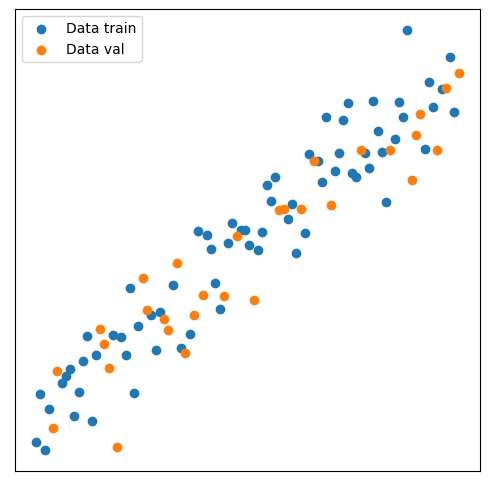

In [91]:
def plot_data(X_train, y_train, X_val, y_val, plot_val=True):
    plt.figure(figsize=(6,6))
    plt.scatter(X_train, y_train, label="Data train")
    if plot_val:
        plt.scatter(X_val, y_val, label="Data val")
    plt.xticks([])
    plt.yticks([])
    plt.legend()
    plt.show()
    
plot_data(X_train, y_train, X_val, y_val, plot_val=True)

In [93]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, 
                                              dtype=torch.float32,
                                              requires_grad=True))
        
        self.bias = nn.Parameter(torch.randn(1, 
                                            dtype=torch.float32,
                                            requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias